## Dimensionality Reduction of MNIST Dataset using AutoEncoders
Goutham Krishnan 21BAI1007

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Reshape, Flatten, Dense, Lambda
from keras import losses

### Loading the data

In [6]:
(train_images, _), (test_images, _) = mnist.load_data()

### Scaling the data

In [7]:
# Scaling
x_train = train_images.astype('float32')/255.
x_test = test_images.astype('float32')/255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Creating the Autoencoder model

In [18]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = Sequential([
        Flatten(),
        Dense(latent_dim, activation='relu'),
    ])
    self.decoder = Sequential([
        Dense(784, activation='sigmoid'),
        Reshape((28, 28)),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [27]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Train the model

In [28]:
autoencoder.fit(x_train, x_train, epochs=20, shuffle=True)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0604
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0568
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0560
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0556
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0554
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0552
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0550
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0549
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0548
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0547
Epoch 11/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0546
Epoch 12/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546
E

In [29]:
print(autoencoder.encoder.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [30]:
print(autoencoder.decoder.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 784)               50960     
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 50960 (199.06 KB)
Trainable params: 50960 (199.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Reconstruct the test images

In [31]:
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

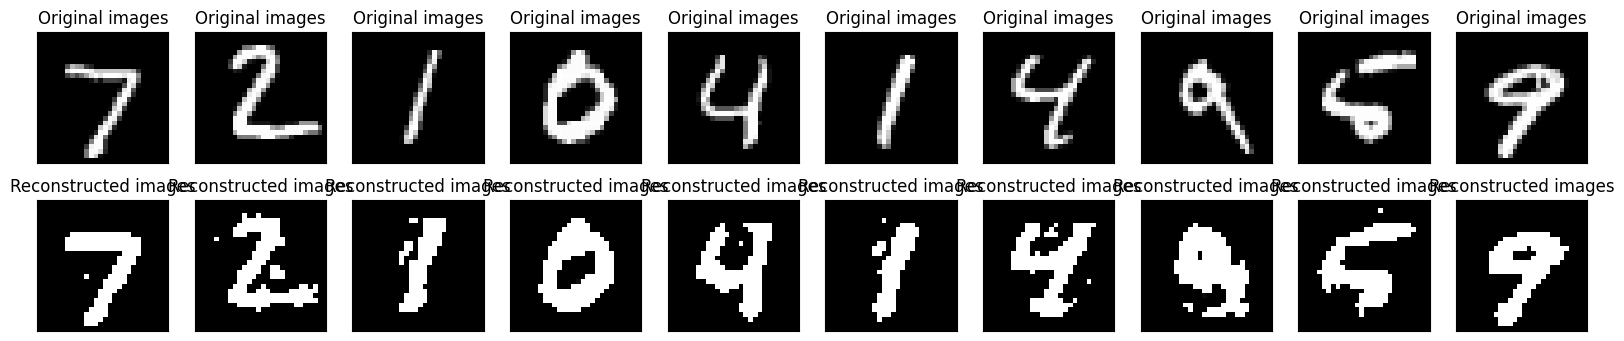

In [32]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_images[i])
  plt.title("Original images")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.title("Reconstructed images")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()